<a href="https://colab.research.google.com/github/abhixz13/AI-ML_IK/blob/main/IK_MiniProject_Jul130633.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import os
import gdown
import zipfile
import pandas as pd
import numpy as np

import nltk
nltk.download('stopwords')
nltk.download('punkt') # provides pre-trained models for tokenizing text into sentences and words.
nltk.download('wordnet') #is a lexical database for the English language.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer
from joblib import Parallel, delayed

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define the URL and file paths
zip_url = "https://drive.google.com/uc?export=download&id=16zn74iUWV-Qiv4yYkaMY-spr-LJIys9Z"
dataset_path = os.path.join("/content/drive/MyDrive/IK_Mini_Project2", "imdb_spoiler")
zip_file_path = os.path.join(dataset_path, "imdb_spoiler_dataset.zip")

# Create the dataset directory if it doesn't exist
if not os.path.exists(dataset_path):
    os.makedirs(dataset_path)

# Download the zip file if it doesn't exist
if not os.path.exists(zip_file_path):
    gdown.download(zip_url, zip_file_path, quiet=False)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    zip_ref.extractall(dataset_path)

print("Dataset downloaded and extracted successfully.")

Dataset downloaded and extracted successfully.


In [ ]:
# List the files
files = os.listdir(os.path.join("/content/drive/MyDrive/IK_Mini_Project2", "imdb_spoiler"))
print(f"files in dataset directory:{files}")

files in dataset directory:['imdb_spoiler_dataset.zip', 'IMDB_movie_details.json', 'IMDB_reviews.json']


In [ ]:
#Reading the files

for file in files:
  file_path = os.path.join(dataset_path, file)

  if file.endswith('.json'):
    data = pd.read_json(file_path, lines= True)

    if 'review' in file.lower():
      reviews = data
    else:
      movies = data

In [ ]:
print (f"Contents of file movies:\n {display(movies.head())}")

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...


Contents of file movies:
 None


In [ ]:
print ("Contents of file movie reviews:\n")
display(reviews.head())

Contents of file movie reviews:



,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"


In [ ]:
reviews['is_spoiler'] = reviews['is_spoiler'].astype(np.int32)

In [ ]:
#Adding plot summary and plot synopsis to the review table by merging movies on movie_id
merged_reviews = reviews.merge(
        movies[['movie_id', 'plot_synopsis', 'plot_summary','genre']],
        on='movie_id',
        how ='left'
    )

In [ ]:
display(merged_reviews.head())

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary,plot_synopsis,plot_summary,genre
0,10 February 2006,tt0111161,ur1898687,1,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,"In 1947, Andy Dufresne (Tim Robbins), a banker...",Chronicles the experiences of a formerly succe...,"[Crime, Drama]"
1,6 September 2000,tt0111161,ur0842118,1,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.,"In 1947, Andy Dufresne (Tim Robbins), a banker...",Chronicles the experiences of a formerly succe...,"[Crime, Drama]"
2,3 August 2001,tt0111161,ur1285640,1,I believe that this film is the best story eve...,8,The best story ever told on film,"In 1947, Andy Dufresne (Tim Robbins), a banker...",Chronicles the experiences of a formerly succe...,"[Crime, Drama]"
3,1 September 2002,tt0111161,ur1003471,1,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?,"In 1947, Andy Dufresne (Tim Robbins), a banker...",Chronicles the experiences of a formerly succe...,"[Crime, Drama]"
4,20 May 2004,tt0111161,ur0226855,1,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted","In 1947, Andy Dufresne (Tim Robbins), a banker...",Chronicles the experiences of a formerly succe...,"[Crime, Drama]"


In [ ]:
#creating a copy of movie_reviews
movie_reviews = merged_reviews.copy()

In [ ]:
print(f"movie_reviews:{movie_reviews['review_text'][0]}")
print(f"review_summary:{movie_reviews['review_summary'][0]}")

movie_reviews:In its Oscar year, Shawshank Redemption (written and directed by Frank Darabont, after the novella Rita Hayworth and the Shawshank Redemption, by Stephen King) was nominated for seven Academy Awards, and walked away with zero. Best Picture went to Forrest Gump, while Shawshank and Pulp Fiction were "just happy to be nominated." Of course hindsight is 20/20, but while history looks back on Gump as a good film, Pulp and Redemption are remembered as some of the all-time best. Pulp, however, was a success from the word "go," making a huge splash at Cannes and making its writer-director an American master after only two films. For Andy Dufresne and Co., success didn't come easy. Fortunately, failure wasn't a life sentence.After opening on 33 screens with take of $727,327, the $25M film fell fast from theatres and finished with a mere $28.3M. The reasons for failure are many. Firstly, the title is a clunker. While iconic to fans today, in 1994, people knew not and cared not wha

**Takeaway**: *Movie review texts has more features or content than review summary.*

RAM usage exceeding system RAM on Google Colab Pro so not able to run this descriptive

### 3. Balance Sampling
Using balanced sampling to sample a random set of 10000 *reviews*

Also reducing the dataset to 10,000 due to computational constraints

In [ ]:
from sklearn.utils import resample

def balanced_sample(data, target_column, sample_size=10000, random_state=42):
  """
    Create a balanced sample from the dataset.

    Parameters:
    - data: pd.DataFrame, the input dataset
    - target_column: str, the name of the target column for balancing
    - sample_size: int, the total number of samples to draw (must be even)
    - random_state: int, random state for reproducibility

    Returns:
    - balanced_sample: pd.DataFrame, the balanced sample
  """

  # Separate the data into two groups based on the target column
  class_1 = data[data[target_column] == 1]
  class_0 = data[data[target_column] == 0]

  num_samples_per_class = sample_size // 2

  # Randomly sample from each group
  class_1_sampled = resample(class_1,
                               replace=False,
                               n_samples=num_samples_per_class,
                               random_state=random_state)

  class_0_sampled = resample(class_0,
                               replace=False,
                               n_samples=num_samples_per_class,
                               random_state=random_state)

  # Combine the samples from both groups
  balanced_sample = pd.concat([class_1_sampled, class_0_sampled])

  # Shuffle the combined sample
  balanced_sample = balanced_sample.sample(frac=1, random_state=random_state).reset_index(drop=True)

  return balanced_sample


# Create a balanced sample
sample_size = 10000
balanced_sample = balanced_sample(movie_reviews, 'is_spoiler', sample_size)

# Save the balanced sample

balanced_sample.to_csv('/content/drive/MyDrive/IK_Mini_Project2/movie_reviews_sample.csv', index=False)

In [ ]:
df_reviews = balanced_sample.copy()

In [ ]:
df_reviews.shape

(10000, 10)

## Data Preprocessing

### 1. Understanding the sample dataset

In [ ]:
df_reviews['movie_id'].nunique()

1460

In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review_date     10000 non-null  object
 1   movie_id        10000 non-null  object
 2   user_id         10000 non-null  object
 3   is_spoiler      10000 non-null  int32 
 4   review_text     10000 non-null  object
 5   rating          10000 non-null  int64 
 6   review_summary  10000 non-null  object
 7   plot_synopsis   10000 non-null  object
 8   plot_summary    10000 non-null  object
 9   genre           10000 non-null  object
dtypes: int32(1), int64(1), object(8)
memory usage: 742.3+ KB


In [ ]:
#Checking the null values in df_reviews
df_reviews.isna().sum()

review_date       0
movie_id          0
user_id           0
is_spoiler        0
review_text       0
rating            0
review_summary    0
plot_synopsis     0
plot_summary      0
genre             0
dtype: int64

### 2. Data preprocessing

#### One Hot Encoding the genre column/ category

In [ ]:
df_reviews['genre'] = df_reviews['genre'].apply(lambda x: ','.join((map(str, x))))
df_reviews.head(2)

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary,plot_synopsis,plot_summary,genre
0,16 January 2005,tt0105629,ur3494098,0,While on the outside the movie seems absurd an...,9,Look past,"Amid a sea of gently-waving tall grass, lies t...",An eccentric toymaker's last wish is that his ...,"Adventure,Comedy,Drama"
1,7 January 2009,tt0455824,ur17306445,1,"I couldn't really decide what this film was, c...",3,Fumbling Antipodean nonsense....,The movie opens with information about World W...,In northern Australia at the beginning of Worl...,"Adventure,Drama,Romance"


In [ ]:
# One-hot encoding the 'genre' column
genre_dummies = df_reviews['genre'].str.get_dummies(sep=',')

# Concatenating the one-hot encoded columns back to the original DataFrame
df_reviews = pd.concat([df_reviews, genre_dummies], axis=1)

# Displaying the resulting DataFrame to see the result
df_reviews.head(2)

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary,plot_synopsis,plot_summary,genre,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,16 January 2005,tt0105629,ur3494098,0,While on the outside the movie seems absurd an...,9,Look past,"Amid a sea of gently-waving tall grass, lies t...",An eccentric toymaker's last wish is that his ...,"Adventure,Comedy,Drama",...,0,0,0,0,0,0,0,0,0,0
1,7 January 2009,tt0455824,ur17306445,1,"I couldn't really decide what this film was, c...",3,Fumbling Antipodean nonsense....,The movie opens with information about World W...,In northern Australia at the beginning of Worl...,"Adventure,Drama,Romance",...,0,0,0,0,1,0,0,0,0,0


In [ ]:
#dropping genre from movie_reviews_encoded
df_reviews.drop('genre', inplace = True, axis = 1)

In [ ]:
# Drop userID as it will not be useful for the analysis
df_reviews.drop('user_id', inplace = True, axis = 1)

In [ ]:
df_reviews['is_spoiler'].value_counts()/len(df_reviews)

is_spoiler
0    0.5
1    0.5
Name: count, dtype: float64

In [ ]:
df_reviews.to_csv('/content/drive/MyDrive/IK_Mini_Project2/movie_reviews_datapreprocessed.csv', index=False)

## Text Preprocessing

### 1. Remove Keywords

In [ ]:
#Remove keywords
_newline_keyword = '\n'
columns = ['review_text','plot_synopsis','plot_summary']
for column in columns:
  df_reviews[column] = df_reviews[column].str.replace(_newline_keyword, '')

df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review_date     10000 non-null  object
 1   movie_id        10000 non-null  object
 2   is_spoiler      10000 non-null  int32 
 3   review_text     10000 non-null  object
 4   rating          10000 non-null  int64 
 5   review_summary  10000 non-null  object
 6   plot_synopsis   10000 non-null  object
 7   plot_summary    10000 non-null  object
 8   Action          10000 non-null  int64 
 9   Adventure       10000 non-null  int64 
 10  Animation       10000 non-null  int64 
 11  Biography       10000 non-null  int64 
 12  Comedy          10000 non-null  int64 
 13  Crime           10000 non-null  int64 
 14  Drama           10000 non-null  int64 
 15  Family          10000 non-null  int64 
 16  Fantasy         10000 non-null  int64 
 17  Film-Noir       10000 non-null  int64 
 18  History

### 2. Remove Stopwords

In [ ]:
#Removing stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load the stop words
stop_words = stopwords.words('english')
stop_words.extend(['@',"'",'.','"','/','!',',',"'ve","...","n't",'$',"'s",'©','''"''',"''",'..','&','*',';','”','``',':','#','!','-','–','?','%',"'d","'m",'+','++','(',')','()'])
stop_words = set(stop_words)

#Function to remove the stopwords
def remove_stopwords(text):
    if isinstance(text, str):
      tokens = word_tokenize(text.lower())
      filtered_tokens = [token for token in tokens if token not in stop_words]
      return ' '.join(filtered_tokens)
    else:
      return text

In [ ]:
df_reviews['review_text'] = df_reviews['review_text'].apply(remove_stopwords)

In [ ]:
df_reviews['plot_summary'] = df_reviews['plot_summary'].apply(remove_stopwords)
df_reviews['plot_synopsis'] = df_reviews['plot_synopsis'].apply(remove_stopwords)

In [ ]:
df_reviews.isna().sum()

review_date       0
movie_id          0
is_spoiler        0
review_text       0
rating            0
review_summary    0
plot_synopsis     0
plot_summary      0
Action            0
Adventure         0
Animation         0
Biography         0
Comedy            0
Crime             0
Drama             0
Family            0
Fantasy           0
Film-Noir         0
History           0
Horror            0
Music             0
Musical           0
Mystery           0
Romance           0
Sci-Fi            0
Sport             0
Thriller          0
War               0
Western           0
dtype: int64

### 3.0 Lemmatization

In [ ]:
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
lemmatizer = WordNetLemmatizer()
# Function to remove stop words and perform lemmatization on a text
def preprocess_text(text):
        tokens = word_tokenize(text.lower())
        filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
        return ' '.join(filtered_tokens)

## NLP Modeling


1. Bag of Words

In [ ]:
#initialize count vector
vectorizer = CountVectorizer()

In [ ]:
#Generate the tokens for each column - review_text, plot_synopsis, plot_summary
# Apply the preprocess_text function in parallel
processed_texts = Parallel(n_jobs=-1)(delayed(preprocess_text)(text) for text in df_reviews['review_text'])
token_reviews = processed_texts

In [ ]:
processed_texts = Parallel(n_jobs=-1)(delayed(preprocess_text)(text) for text in df_reviews['plot_summary'])
token_summary = processed_texts

In [ ]:
processed_texts = Parallel(n_jobs=-1)(delayed(preprocess_text)(text) for text in df_reviews['plot_synopsis'])
token_synopsis = processed_texts

In [ ]:
print(f"length of token_reviews:{len(token_reviews)}")
print(f"\nlength of token_synopsis:{__builtins__.len(token_synopsis)}")
print(f"\nlength of token_summary:{__builtins__.len(token_summary)}")

length of token_reviews:10000

length of token_synopsis:10000

length of token_summary:10000


In [ ]:
#Combined all the tokens to create a list of vocabulary
combined_token = token_reviews + token_synopsis + token_summary
len(combined_token)

30000

In [ ]:
len(token_reviews)

10000

In [ ]:
df_reviews.to_pickle('/content/drive/MyDrive/IK_Mini_Project2/df_reviews_lemma.pk1')

In [ ]:
X_combined_token = vectorizer.fit_transform(combined_token) # shape of (30000,63037)
X_review = vectorizer.transform(token_reviews)              # shape of (10000, 63037)
X_synopsis = vectorizer.transform(token_synopsis)
X_summary = vectorizer.transform(token_summary)

In [ ]:
#Compute cosine similarity score between review-summary and review-synopsis
simscore_synopsis = cosine_similarity(X_review, X_synopsis).diagonal()
simscore_summary = cosine_similarity(X_review, X_summary).diagonal()

In [ ]:
#creating a dataframe with similarity scores as features
df_BoW = pd.DataFrame({
    'simscore_synopsis': simscore_synopsis,
    'simscore_summary': simscore_summary
})

In [ ]:
y_BoW= df_reviews['is_spoiler']

In [ ]:
# Split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(df_BoW, y_BoW, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the classifier
classifier_bow = LogisticRegression()
classifier_bow.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier_bow.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5925
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.69      0.62       987
           1       0.62      0.50      0.55      1013

    accuracy                           0.59      2000
   macro avg       0.60      0.59      0.59      2000
weighted avg       0.60      0.59      0.59      2000



In [ ]:
#Using random forest as classifier
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)

# Predict on the test set
y_pred_RF = classifier_RF.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_RF))
print("Classification Report:\n", classification_report(y_test, y_pred_RF))

Accuracy: 0.5435
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.53      0.54       987
           1       0.55      0.55      0.55      1013

    accuracy                           0.54      2000
   macro avg       0.54      0.54      0.54      2000
weighted avg       0.54      0.54      0.54      2000



2. Using TFIDF

In [ ]:
#initialize TFIDF vector
vectorizer_tf = TfidfVectorizer()

vectorizer_tf.fit_transform(combined_token)
X_review = vectorizer_tf.transform(token_reviews)
X_synopsis = vectorizer_tf.transform(token_synopsis)
X_summary = vectorizer_tf.transform(token_summary)

In [ ]:
#Compute cosine similarity score between review-summary and review-synopsis
simscore_synopsis_tf = cosine_similarity(X_review, X_synopsis).diagonal()
simscore_summary_tf = cosine_similarity(X_review, X_summary).diagonal()

#creating a dataframe with similarity scores as features
df_tf = pd.DataFrame({
    'simscore_synopsis': simscore_synopsis_tf,
    'simscore_summary': simscore_summary_tf
})

In [ ]:
y_tf= df_reviews['is_spoiler']

# Split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(df_tf, y_tf, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the classifier
classifier_tflr = LogisticRegression()
classifier_tflr.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier_tflr.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5885
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.70      0.63       987
           1       0.62      0.48      0.54      1013

    accuracy                           0.59      2000
   macro avg       0.59      0.59      0.58      2000
weighted avg       0.60      0.59      0.58      2000



Accuracy: 0.546
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.54      0.54       987
           1       0.55      0.55      0.55      1013

    accuracy                           0.55      2000
   macro avg       0.55      0.55      0.55      2000
weighted avg       0.55      0.55      0.55      2000



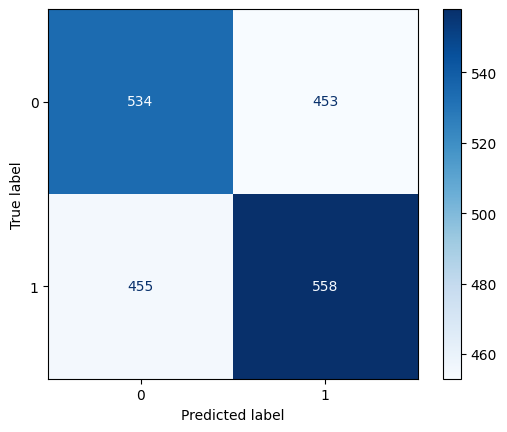

In [ ]:
#Using random forest as classifier
classifier_tfrf = RandomForestClassifier()
classifier_tfrf.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier_tfrf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier_tfrf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Word2Vec
Using Word2Vec to generate embeddings and building a classifier to identify spoiler

In [ ]:
import gensim.downloader as api

In [ ]:
#Load the pre-trained Word2Vec Model
word2vec_model = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
def get_word_embeddings(text,model):
  tokens = word_tokenize(text.lower())
  embeddings = [model[token] for token in tokens if token in model]
  if not embeddings:
    return np.zeros(300)
  return np.mean(embeddings, axis = 0)

In [ ]:
df_reviews['review_embeddings']=df_reviews['review_text'].apply(lambda x: get_word_embeddings(x,word2vec_model))
df_reviews['synopsis_embeddings'] = df_reviews['plot_synopsis'].apply(lambda x: get_word_embeddings(x, word2vec_model))

In [ ]:
df_reviews['review_embeddings'][1].shape

(300,)

In [ ]:
#Compute cosine similarity score between review-summary and review-synopsis
df_reviews["W2Vscore_synopsis"] = df_reviews.apply(
    lambda x: cosine_similarity([x['review_embeddings']], [x['synopsis_embeddings']])[0][0],
    axis=1
)

In [ ]:
X_W2V = df_reviews[['W2Vscore_synopsis']]
y_W2V = df_reviews['is_spoiler']

In [ ]:
# Split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_W2V, y_W2V, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

Accuracy: 0.59
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.40      0.49       987
           1       0.57      0.78      0.66      1013

    accuracy                           0.59      2000
   macro avg       0.60      0.59      0.57      2000
weighted avg       0.60      0.59      0.57      2000



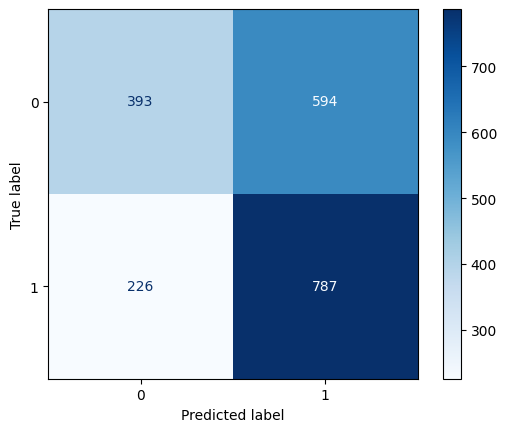

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Hyperparameter tuning for Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

Best parameters found:  {'C': 0.01, 'solver': 'lbfgs'}
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.40      0.49       987
           1       0.57      0.78      0.66      1013

    accuracy                           0.59      2000
   macro avg       0.60      0.59      0.57      2000
weighted avg       0.60      0.59      0.57      2000



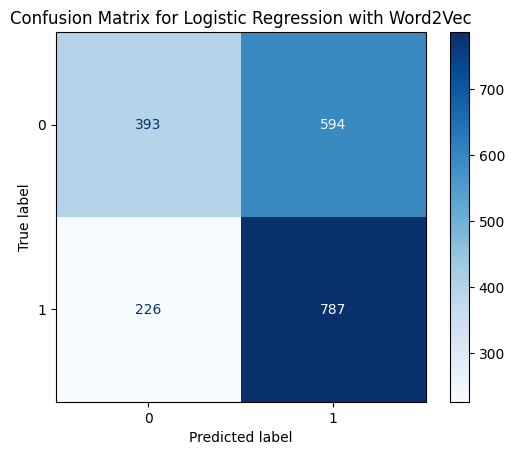

In [ ]:
# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'], # Optimization algorithm
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Best estimator
best_log_reg = grid_search.best_estimator_

# Predict on the test set
ypred = best_log_reg.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))

# Compute and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_log_reg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Logistic Regression with Word2Vec")
plt.show()

In [ ]:
# Hyperparameter tuning for Random Forest

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': ['sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30],  # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}

# Initialize the Random Forest model
rmforest = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(rmforest, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Best estimator
best_rmforest = grid_search.best_estimator_

# Predict on the test set
ypred = best_rmforest.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))

# Compute and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_log_reg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Logistic Regression with Word2Vec")
plt.show()

In [ ]:
df_reviews.to_pickle('/content/drive/MyDrive/IK_Mini_Project2/df_reviews_preBERT.pk1')

## BERT - Transfer Learning and Fine Tuning

In [ ]:
#Reading the dataset for BERT model

df_reviews = pd.read_pickle('/content/drive/MyDrive/IK_Mini_Project2/df_reviews_preBERT.pk1')

In [ ]:
!pip install transformers

In [ ]:
#Load pre-trained BERT model and Tokenizer
from transformers import AlbertTokenizer, AlbertModel
import torch

In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   review_date          10000 non-null  object 
 1   movie_id             10000 non-null  object 
 2   is_spoiler           10000 non-null  int32  
 3   review_text          10000 non-null  object 
 4   rating               10000 non-null  int64  
 5   review_summary       10000 non-null  object 
 6   plot_synopsis        10000 non-null  object 
 7   plot_summary         10000 non-null  object 
 8   Action               10000 non-null  int64  
 9   Adventure            10000 non-null  int64  
 10  Animation            10000 non-null  int64  
 11  Biography            10000 non-null  int64  
 12  Comedy               10000 non-null  int64  
 13  Crime                10000 non-null  int64  
 14  Drama                10000 non-null  int64  
 15  Family               10000 non-null  

In [ ]:
df_reviews.isna().sum()

review_date            0
movie_id               0
is_spoiler             0
review_text            0
rating                 0
review_summary         0
plot_synopsis          0
plot_summary           0
Action                 0
Adventure              0
Animation              0
Biography              0
Comedy                 0
Crime                  0
Drama                  0
Family                 0
Fantasy                0
Film-Noir              0
History                0
Horror                 0
Music                  0
Musical                0
Mystery                0
Romance                0
Sci-Fi                 0
Sport                  0
Thriller               0
War                    0
Western                0
review_embeddings      0
synopsis_embeddings    0
W2Vscore_synopsis      0
dtype: int64

In [ ]:
# Load the pre-trained BERT tokenizer and model
tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')
model = AlbertModel.from_pretrained('albert-base-v2')

In [ ]:
review_lengths = df_reviews['review_text'].apply(lambda x: len(x))
max_length = review_lengths.max()
print("Maximum review length:", max_length)

Maximum review length: 5992


In [ ]:
summary_lengths = df_reviews['plot_summary'].apply(lambda x: len(x))
max_length = summary_lengths.max()
print("Maximum summary length:", max_length)

Maximum summary length: 840


We have not defined the maximum length of review and summary as it will be truncated at 512 tokens by Albert and Bert.

In [ ]:
#Convert text to AlbERT embeddings
def get_albert_embeddings(text, tokenizer, model):
  inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding=True)
  with torch.no_grad():
      outputs = model(**inputs)
  return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

In [ ]:
# Function to apply in parallel
df_reviews['review_embeddings'] = df_reviews['review_text'].apply(lambda text:get_albert_embeddings(text, tokenizer, model))

In [ ]:
df_reviews['summary_embeddings'] = df_reviews['plot_summary'].apply(lambda text:get_albert_embeddings(text, tokenizer, model))

In [ ]:
len(df_reviews['summary_embeddings'][1])

768

In [ ]:
df_reviews.to_pickle('/content/drive/MyDrive/IK_Mini_Project2/df_review_Albertembeddings.pk1')

Parallelizing:
1. Parallel and delayed functions from joblib helps to distribute the work across multiple CPU cores.
2. n_jobs=-1: This argument tells joblib to use all available CPU cores for parallel processing


In [ ]:
df_reviews['albert_similarityscore'] = df_reviews.apply(lambda x: cosine_similarity([x['review_embeddings']], [x['summary_embeddings']])[0][0],axis=1)

In [ ]:
# Generating training data and labels in the desired (batch_size, 1)shape
X = df_reviews['albert_similarityscore'].values.reshape(-1,1)
y = df_reviews['is_spoiler'].values # y should be of the shape (batch_size, )

In [ ]:
y.shape

(10000, 1)

In [ ]:
# Split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.50      0.53       987
           1       0.56      0.62      0.59      1013

    accuracy                           0.56      2000
   macro avg       0.56      0.56      0.56      2000
weighted avg       0.56      0.56      0.56      2000



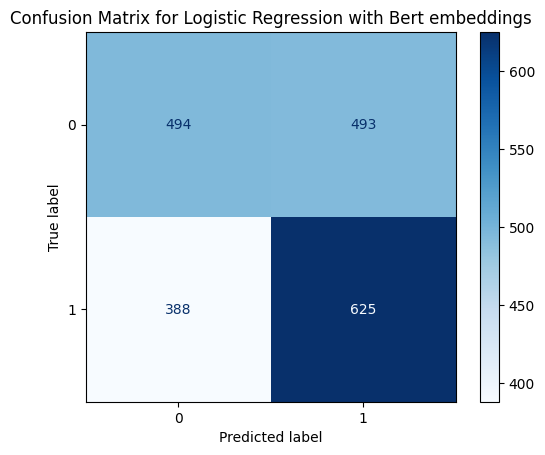

In [ ]:
# Initialize and train the classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))

# Compute and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Logistic Regression with AlBert embeddings")
plt.show()

In [ ]:
y_pred

array([0, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
df_reviews.to_pickle('/content/drive/MyDrive/IK_Mini_Project2/df_review_BertClassifier.pk1')

## Custom Manhattan LSTM

1. Building a custom Manhattan LSTM Model
2. Using BERT for generating static tokens and embeddings that we will feed into training an LSTM Model
3. Train using a subset of 10000 reviews given the computing resource constraint.



Build the custom LSTM model

In [35]:
#df_reviews= pd.read_pickle('/content/drive/MyDrive/IK_Mini_Project2/df_review_BertClassifier.pk1')
df_reviews = pd.read_pickle('/content/df_review_BertClassifier.pk1')

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim

In [37]:
#Convert text to AlbERT embeddings
def get_LSTM_embeddings(text, tokenizer, model):
  inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding='max_length')
  #print(f"Tokenized input shape: {inputs['input_ids'].shape}")

  with torch.no_grad():
      outputs = model(**inputs)
  #print(f"Model output shape: {outputs.last_hidden_state.shape}")

  embeddings = outputs.last_hidden_state.squeeze()
  #print(f"Embeddings shape: {embeddings.shape}")

  return embeddings.numpy()

In [44]:
# Function to apply in parallel
df_reviews['lstm_review_embeds'] = df_reviews['review_text'].apply(lambda text:get_LSTM_embeddings(text, tokenizer, model))

In [45]:
# Function to apply in parallel
df_reviews['lstm_summary_embeds'] = df_reviews['plot_summary'].apply(lambda text:get_LSTM_embeddings(text, tokenizer, model))

In [ ]:
df_reviews.to_pickle('/content/drive/MyDrive/IK_Mini_Project2/df_reviews_LSTM_embeddings.pk1')
#df_reviews = pd.read_pickle('/content/drive/MyDrive/IK_Mini_Project2/df_reviews_LSTM_embeddings.pk1')

In [40]:
df_reviews['review_embeddings'] = df_reviews['lstm_review_embeds'].apply(lambda x: np.mean(x, axis=0))
df_reviews['summary_embeddings'] = df_reviews['lstm_summary_embeds'].apply(lambda x: np.mean(x, axis=0))

KeyError: 'lstm_review_embeds'

In [ ]:
# calculating cosine similarity between review_embeddings and summary_embeddings
df_reviews['NN_score'] = df_reviews.apply(lambda x: cosine_similarity([x['review_embeddings']], [x['summary_embeddings']])[0][0],axis=1)

In [ ]:
df_reviews.to_pickle('/content/drive/MyDrive/IK_Mini_Project2/df_reviews_LSTM_embeddings2.pk1')

KeyboardInterrupt: 

## Forward Neural Net Classifier

In [ ]:
df_reviews = pd.read_pickle('/content/drive/MyDrive/IK_Mini_Project2/df_reviews_LSTM_embeddings2.pk1')

EOFError: Ran out of input

In [ ]:
#Transforming the inputs into right input structure for NN model feed

review_embeddings = np.array(df_reviews['review_embeddings'].tolist(), dtype=np.float32)
summary_embeddings = np.array(df_reviews['summary_embeddings'].tolist(), dtype=np.float32)
NN_similarityscore = np.array(df_reviews['NN_score'].tolist(), dtype=np.float32)

# Converting inputs into pytorch tensor to feed into building LSTM model
reviews = torch.tensor(review_embeddings, dtype=torch.float32)
summaries = torch.tensor(summary_embeddings, dtype=torch.float32)
NN_scores = torch.tensor(NN_similarityscore,dtype=torch.float32)
labels = torch.tensor(df_reviews['is_spoiler'].values, dtype=torch.float32)

In [ ]:
#splitting the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(NN_scores, labels, test_size=0.2, random_state=42)

In [ ]:
class ReviewClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ReviewClassifier, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(input_dim, hidden_dim)  # First layer
        self.relu = nn.ReLU()                        # Activation function
        self.fc2 = nn.Linear(hidden_dim, int(hidden_dim*0.5)) # Output layer
        self.fc3 = nn.Linear(int(hidden_dim*0.5), int(hidden_dim*0.25)) # Output layer
        self.fc4 = nn.Linear(int(hidden_dim*0.25), output_dim) # Output layer

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.fc1(x)    # Pass input through the first layer
        x = self.relu(x)   # Apply activation function
        x = self.fc2(x)    # Final layer to produce the output
        x = self.relu(x)   # Apply activation function
        x = self.fc3(x)    # Final layer to produce the output
        x = self.relu(x)   # Apply activation function
        x = self.fc4(x)    # Final layer to produce the output
        return x

#Parameters
input_dim = 1  # Dimension of the averaged embeddings
hidden_dim = 128 # Size of the hidden layer

output_dim = 1   # For binary classification tasks, e.g., spoiler or not
learning_rate = 0.05
num_epochs = 1000

model = ReviewClassifier(input_dim, hidden_dim, output_dim)

In [ ]:
#Training the model

criterion = nn.BCEWithLogitsLoss()  # Binary cross-entropy loss for binary classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Assuming you have data loaded in variables `features` and `labels`
for epoch in range(num_epochs):
    optimizer.zero_grad()          # Clear gradients
    outputs = model(X_train)      # Compute model output
    loss = criterion(outputs, y_train.unsqueeze(1))  # Compute loss
    loss.backward()               # Backpropagate the loss
    optimizer.step()              # Update weights

    # print(f"Epoch {epoch+1}, Loss: {loss.item()}")

Classification Report:
               precision    recall  f1-score   support

         0.0       0.51      0.84      0.64       987
         1.0       0.59      0.22      0.32      1013

    accuracy                           0.53      2000
   macro avg       0.55      0.53      0.48      2000
weighted avg       0.55      0.53      0.48      2000



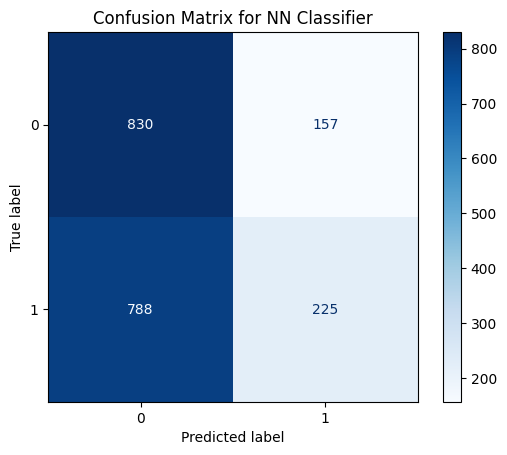

In [ ]:
# Function to predict using the model
def predict(model, inputs, threshold):
    with torch.no_grad():  # Ensure no gradients are calculated
        logits = model(inputs)      # Get raw logits from the model
        probabilities = torch.sigmoid(logits)  # Convert logits to probabilities
        labels = (probabilities > threshold).float()
        return labels

threshold = 0.5
model.eval()  # Set the model to evaluation mode
y_pred = predict(model, X_test, threshold)

cm = confusion_matrix(y_test, y_pred)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))

# Compute and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for NN Classifier")
plt.show()

## Siamese LSTM Model

In [ ]:
review_embeddings = np.array(df_reviews['lstm_review_embeds'].tolist(), dtype=np.float32)
summary_embeddings = np.array(df_reviews['lstm_summary_embeds'].tolist(), dtype=np.float32)
#lstm_labels = np.array(df_reviews['is_spoiler'].tolist(), dtype=np.float32)

# Converting inputs into pytorch tensor to feed into building LSTM model
reviews = torch.tensor(review_embeddings, dtype=torch.float32)
summaries = torch.tensor(summary_embeddings, dtype=torch.float32)
lstm_label = torch.tensor(df_reviews['is_spoiler'].values, dtype=torch.float32)

In [ ]:
reviews.shape

torch.Size([10000, 512, 768])

In [ ]:
#Generating training and testing dataset
X_train_review, X_test_review, X_train_summary, X_test_summary, y_train, y_test = train_test_split(reviews, summaries, lstm_label, test_size=0.2, random_state=42)

In [ ]:
X_train_summary.shape

torch.Size([8000, 512, 768])

In [ ]:
class lstm_model(nn.Module):
  def __init__(self, input_dim, hidden_dim, n_layers, output_dim, dropout_rate):
    super(lstm_model, self).__init__()

    '''
      The parent class's __init__ method needs to be called to ensure that all attributes and methods defined in the parent class are properly initialized.
      Here, we are calling the super class of LSTM model
    '''

    self.lstm = nn.LSTM(input_dim,hidden_dim, n_layers, batch_first=True, dropout=dropout_rate)
    self.fc = nn.Linear(hidden_dim, hidden_dim) # Fully connected layer- maps the last hidden state to the output dim

  def forward(self, x):
    print (f"x.shape:{x.shape}")
    #x = x.unsqueeze(1)
    print (f"x.shape after unsqueezing:{x.shape}")
    h0 = torch.zeros(n_layers, x.shape[0], hidden_dim).to(x.device)
    c0 = torch.zeros(n_layers, x.shape[0], hidden_dim).to(x.device)
    out, _ = self.lstm(x, (h0, c0))
    print (f"Shape of LSTM output:{out.shape}")
    '''
        out, (hidden state, cell_state) = self.lstm(x, (h0, c0)`
        out: Contains the hidden state for each time step with shape (batch_size, sequence_length, hidden_dim)
        hidden_state: Contains the final hidden state for each layer with shape (num_layers, batch_size, hidden_dim)
        cell_state: Contains the final cell state for each layer with shape (num_layers, batch_size, hidden_dim)
    '''
    out = self.fc(out[:, -1, :]) # selects the hidden state output of the last time stamp from each sequence in the batch in the layer
    print (f"out.shape post fc:{out.shape}")
    return out

In [ ]:
#Defining the Siamese Network
class SiameseNetwork(nn.Module):
  def __init__(self, input_dim, hidden_dim, n_layers,output_dim,dropout_rate):
    super(SiameseNetwork, self).__init__()

    self.lstm_review = lstm_model(input_dim, hidden_dim, n_layers,output_dim,dropout_rate)
    self.lstm_summary = lstm_model(input_dim, hidden_dim, n_layers,output_dim,dropout_rate)
    self.fc = nn.Linear(hidden_dim, output_dim)
    self.sigmoid = nn.Sigmoid()

  def forward(self, review, summary):
    review_encoded = self.lstm_review(review)
    summary_encoded = self.lstm_summary(summary)
    #print(f"Encoded Reviews Shape:{review_encoded.shape}")  # Should print something like (batch_size, hidden_dim)
    #print(f"Encoded Summaries Shape:{summary_encoded.shape}")  # Should match above

    combined_feature = torch.abs(review_encoded-summary_encoded)
    #print(f"Combined Feature Shape:{combined_feature.shape}")  # Should be (batch_size, hidden_dim)

    logits = self.fc(combined_feature)
    output = self.sigmoid(logits)

    return output

NameError: name 'nn' is not defined

In [ ]:
# Training the Siamese network
#hyperparameters
input_dim = 768 # df_reviews['review_embeddings'][0].shape[0]
hidden_dim = 128
output_dim = 1  # Example: binary classification
n_layers = 5
learning_rate = 0.005
num_epochs = 10
dropout_rate = 0.4

model = SiameseNetwork(input_dim, hidden_dim, n_layers,output_dim,dropout_rate)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

NameError: name 'SiameseNetwork' is not defined

In [ ]:
for epoch in range(num_epochs):
  model.train()
  optimizer.zero_grad()

  #Forward Pass
  outputs = model(X_train_review,X_train_summary) #invoking the forward pass of the siamesenetwork
  #print(f"Shape of output of Siamese network:{outputs.shape}")
  #print(f"Shape of output of label:{y_train.shape}")
  loss = criterion(outputs, y_train.unsqueeze(1)) # outputs will have the shape of (Batch_size, 1). Squeeze will remove the extra dimension which is batch size
  loss.backward()
  optimizer.step()

  print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


x.shape:torch.Size([8000, 512, 768])
x.shape after unsqueezing:torch.Size([8000, 512, 768])
Shape of LSTM output:torch.Size([8000, 512, 128])
out.shape post fc:torch.Size([8000, 128])
x.shape:torch.Size([8000, 512, 768])
x.shape after unsqueezing:torch.Size([8000, 512, 768])


Classification Report:
               precision    recall  f1-score   support

         0.0       0.66      0.51      0.57       987
         1.0       0.61      0.75      0.67      1013

    accuracy                           0.63      2000
   macro avg       0.64      0.63      0.62      2000
weighted avg       0.63      0.63      0.62      2000



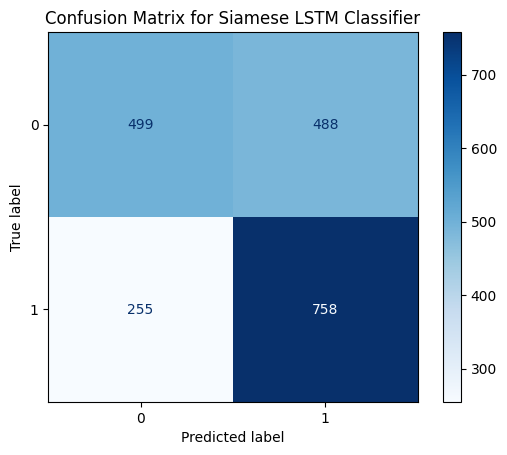

In [ ]:
# Function to predict using the model
def predict(model, input1, input2, threshold):
    with torch.no_grad():  # Ensure no gradients are calculated
        logits = model(input1,input2)      # Get raw logits from the model
        probabilities = torch.sigmoid(logits)  # Convert logits to probabilities
        labels = (probabilities > threshold).float()
        return labels

threshold = 0.60
model.eval()  # Set the model to evaluation mode
y_pred = predict(model, X_test_review, X_test_summary, threshold)

cm = confusion_matrix(y_test, y_pred)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))

# Compute and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Siamese LSTM Classifier")
plt.show()

**Findings**:
1. Increasing the number of LSTM layers from 2 to 50 led to loss function stagnating during training
2. We will try using GRU instead of LSTM
3. We will use dropout to reduce overfitting